# [E1]1st_project_rock-scissor-paper_classifier

### 전다형

첫번재, 필요한 라이브러리 호출을 한다.

In [ ]:
#파일경로를 쓰기 위해 os, 파일 리스트 뽑을때 경로명 이용하는 glob 
import os, glob 
#파일 데이터 처리를 위한 numpy
import numpy as np
#딥러닝 구조를 만들기 위한 라이브러리 텐서플로우
import tensorflow as tf
from tensorflow import keras
#이미지를 보기 위한 pil
from PIL import Image
import matplotlib.pyplot as plt

# PIL 라이브러리가 설치되어 있지 않다면 설치
# !pip install pillow   
#print("PIL 라이브러리 import 완료!")

두번째, 데이터처리를 위해 데이터를 불러오고 필요한 사이즈로 변경한다.

In [1]:
# 여러명의 데이터를 모아서 쓰기 위해 각 폴더별로 데이터를 넣었고 for문을 위해 리스트로 생성
folder_num = [
    'train_0', 'train_1', 'train_2', 'train_3', 'train_4', 'train_5', 'train_6', 'train_7', 'train_8', 'train_9', 'train_10',
    'train_11', 'train_12', 'train_13', 'train_14', 'train_15', 'train_16', 'train_17', 'train_18', 'train_19', 'train_20']

# 여기서 각각 사람들이 만든 train 폴더별 데이터를 뽑아오기 위한 for문
for i in folder_num:
    #기존 코드에서 여러명의 데이터를 처리하기 위해 수정함    
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train"+"/"+i+"/scissor"
    print("이미지 디렉토리 경로: ", image_dir_path)
    images=glob.glob(image_dir_path + "/*.jpg")  
    
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
    print("가위 이미지 resize 완료!")
    
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train"+"/"+i+"/rock"
    print("이미지 디렉토리 경로: ", image_dir_path)
    images=glob.glob(image_dir_path + "/*.jpg")  
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
    print("주먹 이미지 resize 완료!")
    
    image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train"+"/"+i+"/paper"
    print("이미지 디렉토리 경로: ", image_dir_path)
    images=glob.glob(image_dir_path + "/*.jpg")  
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")

    print("보 이미지 resize 완료!")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_0/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_0/rock
주먹 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_0/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_1/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_1/rock
주먹 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_1/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_2/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_2/rock
주먹 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_2/paper
보 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_3/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/rock_scissor_paper_train/train_3/rock
주먹 이미지 resize 완료!
이미지 디렉토리 경로:  /home/mns/aiffel/

## 리사이즈된 이미지의 라벨링 작업을 수행

In [3]:
#함수 만들기. 위와 같이 각 train폴더별로 전체 이미지를 불러오기 위해 for문 추가

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=6300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for i in folder_num:
        image_dir_path = img_path+"/"+i
        print(image_dir_path)
        for file in glob.iglob(image_dir_path+'/scissor/*.jpg'):
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
            labels[idx]=0   # 가위 : 0
            idx=idx+1
        print("학습데이터(x_train)의 scissor 이미지 개수는",idx,"입니다.")    
        for file in glob.iglob(image_dir_path+'/rock/*.jpg'):
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
            labels[idx]=1   # 바위 : 1
            idx=idx+1   
        print("학습데이터(x_train)의 rock 이미지 개수는",idx,"입니다.")    
        for file in glob.iglob(image_dir_path+'/paper/*.jpg'):
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
            labels[idx]=2   # 보 : 2
            idx=idx+1
        print("학습데이터(x_train)의 paper이미지 개수는",idx,"입니다.")
    return imgs, labels

### 위에서 만든 함수를 이용하여 전체 학습용 이미지와 라벨을 가져옴

In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_train"
#데이터 로드, 중요!
(x_train, y_train)=load_data(image_dir_path)
#print(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

/home/mns/aiffel/rock_scissor_paper_train/train_0
학습데이터(x_train)의 scissor 이미지 개수는 100 입니다.
학습데이터(x_train)의 rock 이미지 개수는 200 입니다.
학습데이터(x_train)의 paper이미지 개수는 300 입니다.
/home/mns/aiffel/rock_scissor_paper_train/train_1
학습데이터(x_train)의 scissor 이미지 개수는 400 입니다.
학습데이터(x_train)의 rock 이미지 개수는 500 입니다.
학습데이터(x_train)의 paper이미지 개수는 600 입니다.
/home/mns/aiffel/rock_scissor_paper_train/train_2
학습데이터(x_train)의 scissor 이미지 개수는 700 입니다.
학습데이터(x_train)의 rock 이미지 개수는 800 입니다.
학습데이터(x_train)의 paper이미지 개수는 900 입니다.
/home/mns/aiffel/rock_scissor_paper_train/train_3
학습데이터(x_train)의 scissor 이미지 개수는 1000 입니다.
학습데이터(x_train)의 rock 이미지 개수는 1100 입니다.
학습데이터(x_train)의 paper이미지 개수는 1200 입니다.
/home/mns/aiffel/rock_scissor_paper_train/train_4
학습데이터(x_train)의 scissor 이미지 개수는 1300 입니다.
학습데이터(x_train)의 rock 이미지 개수는 1400 입니다.
학습데이터(x_train)의 paper이미지 개수는 1500 입니다.
/home/mns/aiffel/rock_scissor_paper_train/train_5
학습데이터(x_train)의 scissor 이미지 개수는 1600 입니다.
학습데이터(x_train)의 rock 이미지 개수는 1700 입니다.
학습데이터(x_train)의 paper이미지 개수는

학습용 파일이 잘 들어왔는지 해당 파일과 라벨링을 확인

라벨:  1


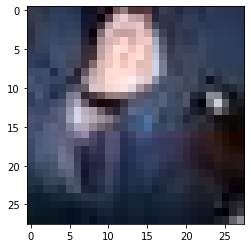

In [5]:
plt.imshow(x_train[2800])
print('라벨: ', y_train[2800])

## 딥러닝 모델 구성
세개의 Conv2D 모델로서 기존에서 하나 더 추가를 하였고 
예전 기억을 더듬어 Dropout을 추가해보았다. 
채널별 레이어수를 여러번 변경해보았으나 순차적으로 커져가는 형태가 괜찮았던것같다. 

In [6]:
n_channel_1=64
n_channel_2=128
n_channel_3=256
n_dense=512
n_train_epoch=50

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=n_train_epoch)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         2

## 모델 결과 확인
학습된 모델과 테스트용 데이터를 통해 최종 결과를 확인해보자
학습용 데이터와는 다르게 300장만 필요하므로 기존 코드에서 이름만 변경하여 사용을 함

In [8]:
def load_data_for_test(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_data_for_test(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
10/10 - 0s - loss: 3.0694 - accuracy: 0.6200
test_loss: 3.069385051727295 
test_accuracy: 0.6200000047683716


## 마치며..
처음 3000장으로 시작했을 때는 결과가 0.4~0.55 정도 정확도를 가졌었다. 
6000장으로 늘렸을 때에도 큰 변화가 없어서 고민이 많아 
모델 구성과 채널수를 여러번 변경을 해보았지만 눈에 띄는 성능향상은 없었다.
조원의 조언에 따라 테스트 데이터를 변경하여 다시 처음부터 학습하고 결과를 보니 
0.6을 가뿐히 넘었다.학습용말고도 테스트용 데이터도 중요하구나 ..
1번 예제를 통해 전반적인 구성을 알 수 있었고 차근차근 모델의 세부구성 내용과 
구조에 대해 배워나간다면 끝에서는 의미없이 숫자만 바꿔서 학습해보는 일은 줄어들지 않을까